In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## References:

[0] [Gregory Michaelson FE Exam Review: Transportation](https://www.youtube.com/watch?v=us26CSISYHE)

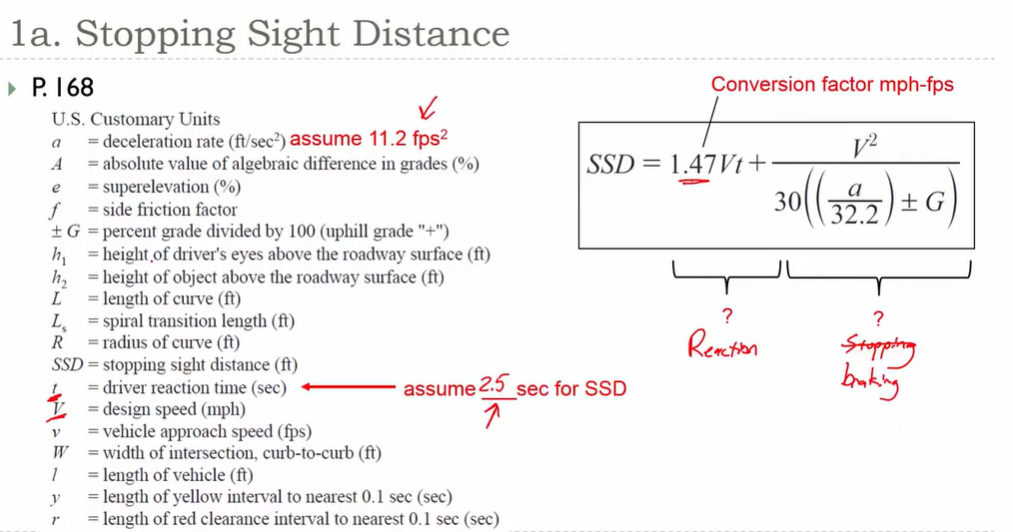
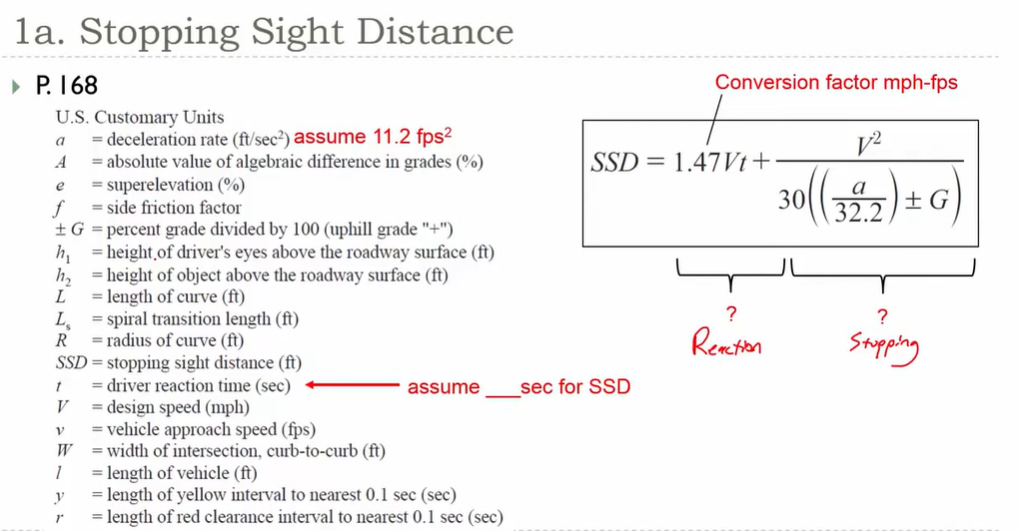
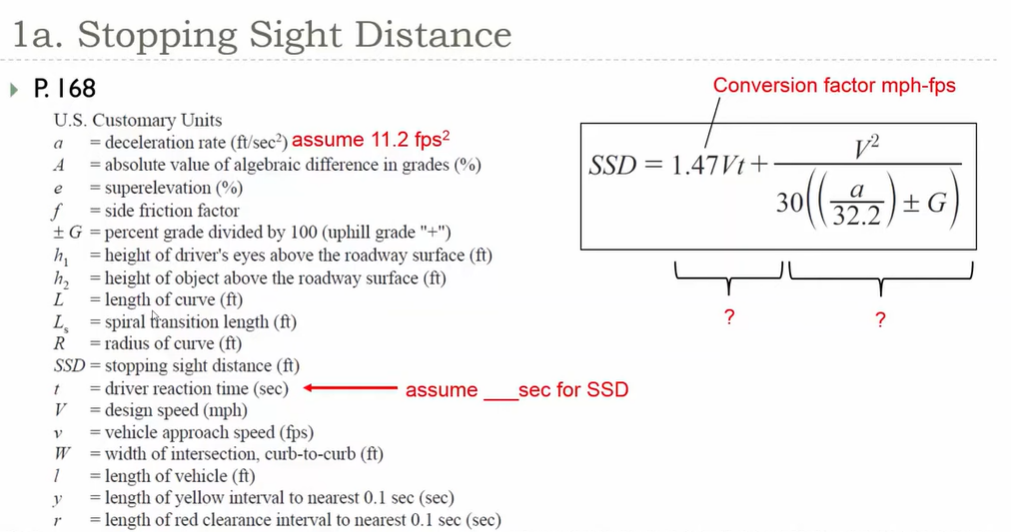

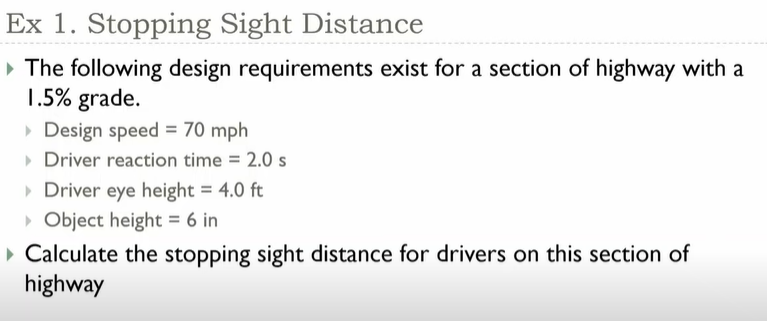

In [6]:
grade = 1.5 #%
grade /= 100 # we are given in ft so grade must be converted into decimals
V = 70 # mph 
t = 2.0 # seconds 
a = 11.2 # ft/sec^2

ssd = 1.47*V*t + (V**2/(30*((a/32.2) - grade))) # always consider the conservative value
print(f'Stopping sight distance: {round(ssd,3)} ft')

Stopping sight distance: 696.547 ft


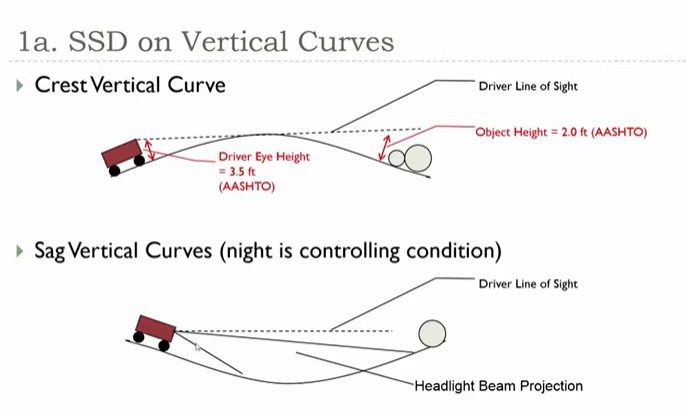

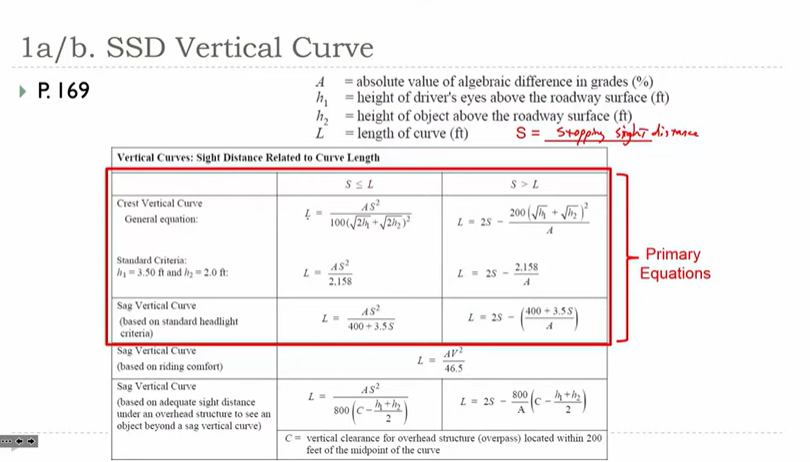

## Algorithm:

- First let's evaluate 2 inequalities: $$ S \le L   $$   $$ S \gt L $$
- Then we need to determine the required S (Stopping Sight Distance) from the table above or calculate the minimum curve length (L)
- We solve for both equations and the L in the equation with the true equality is the one used for the design vertical curve length

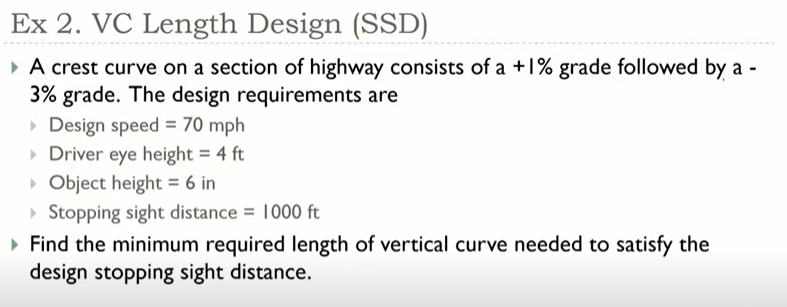

In [7]:
# From the given problem above, we need to determine the minimum required length of the vertical curve needed to satisfy the design stopping sight distance
s_less_L = True 
g1 = 1 #% 
g1/= 100 
g2 = -3 
g2 /= 100 
V = 70 # mph 
h1 = 4 # ft 
h2 = 6 # in 
ssd = 1000 # ft 

In [ ]:
class Road:
    def __init__(self,g1,g2,V,h1,h2,ssd):
        self.g1 = g1
        self.g2 = g2 
        self.v = V 
        self.h1 = h1 
        self.h2 = h2 
        self.ssd = ssd 
    
    def calculate_curve(self,s_less_L):
        if s_less_L:
            